<a href="https://colab.research.google.com/github/hydrol88/edu/blob/master/MNIST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion MNIST

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)

2.3.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print("Fashion MNIST images train data의 크기는 {} 이다".format(train_images.shape))
print("Fashion MNIST images train label의 크기는 {} 이다".format(train_labels.shape))
print("Fashion MNIST images test data의 크기는 {} 이다".format(test_images.shape))
print("Fashion MNIST images test label의 크기는 {} 이다".format(test_labels.shape))

Fashion MNIST images train data의 크기는 (60000, 28, 28) 이다
Fashion MNIST images train label의 크기는 (60000,) 이다
Fashion MNIST images test data의 크기는 (10000, 28, 28) 이다
Fashion MNIST images test label의 크기는 (10000,) 이다


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
np.set_printoptions(linewidth = 150)
print(train_images[0]) # 넘파이 배열로 출력한 결과(0~255 사이의 값으로 부츠형상)
print("품목 이름은 {}이고 Label 번호는 {} 이다.".format(class_names[train_labels[0]],train_labels[0])) # Ankle boot에 해당하는 라벨번호 9번

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

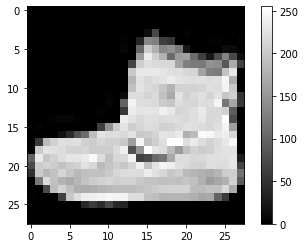

In [7]:
plt.figure()
plt.imshow(train_images[0], cmap = 'gray') # 이미지로 출력한 결과
plt.colorbar()
plt.grid(False)

In [8]:
# NN 모형에 들어가기 전에 0~255으로 포함된 이미지의 픽셀값이 0~1사이의 값을 가지도록 조정
train_images = train_images / 255.0
test_images = test_images / 255.0
print(np.round(train_images[0], 2)) # 0~1사이 값으로 변환 후, 자리수 반올림 조정을 통해 부츠 형상 출력

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.29 0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.14 0.53 0.5  0.24 0.21 0.   0.   0.   0.   0.01 0.02 0.   0.   0.01]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.   0.4  0.8  0.69 0.53 0.56 0.48 0.09 0.   0.   0.   0.   0.05 0.04 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.61 0.93 0.81 0.7  0.42 0.61 0.63 0.43 0.25 0.09 0.3  0.51 0.28 0.06]

In [9]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

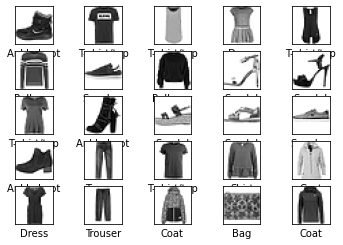

In [10]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # 입력레이어는 크기 28x28인 이미지를 입력으로 받아 크기 784(=28x28)인 1차원 배열로 변경, 입력 레이어는 노드 개수는 784개, 외부입력을 신경망으로 가져오는 역할
    keras.layers.Dense(128, activation=tf.nn.relu), # 히든레이어는 128개를 Dense 레이어 사용
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax) # 출력레이어는 신경망의 출력을 외부로 전달역할로 10개 사용, Softmax를 사용하면 10개의 노드값에 적용되는 합이 1이 됨, 10개의 노드값 중 큰 값이 신경망이 예측하는 결과값
])

In [12]:
model.compile(optimizer='adam', #옵티마이져는 학습 데이터셋과 손실함수를 사용하여 모델의 가중치를 업데이트하는 방법 결정
              loss='sparse_categorical_crossentropy',  # 학습시키는 동안 손실함수를 최소화하도록 모델의 가중치 조정
              metrics=['accuracy']) # 평가지표(metrics)는 학습과 평가시 모델 성능을 측정하기 위해 사용, 전체 데이터셋에서 올바르게 분류된 이미지 비율을 표시하는 정확도 사용

In [13]:
model.fit(train_images, train_labels, epochs=10)  # model.fit 메소드를 사용하여 모델을 학습시킴

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4978 - accuracy: 0.8210
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3687 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3347 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3141 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2808 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2692 - accuracy: 0.8973
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2589 - accuracy: 0.9025
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2502 - accuracy: 0.9048
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.245

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3532 - accuracy: 0.8865


In [15]:
model.save('Fashion_MNISTmodel.h5')